In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Loading the Dataset

In [3]:
ev = pd.read_csv("C:/Users/tvina/OneDrive/Desktop/ML Internship/Project-2/ElectricCarData_Clean.csv")

In [4]:
ev.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


# Exploratory Data Analysis

In [5]:
ev.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [6]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [7]:
ev.shape

(103, 14)

In [8]:
ev.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [9]:
ev.dtypes

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH      object
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Segment             object
Seats                int64
PriceEuro            int64
dtype: object

In [10]:
ev.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

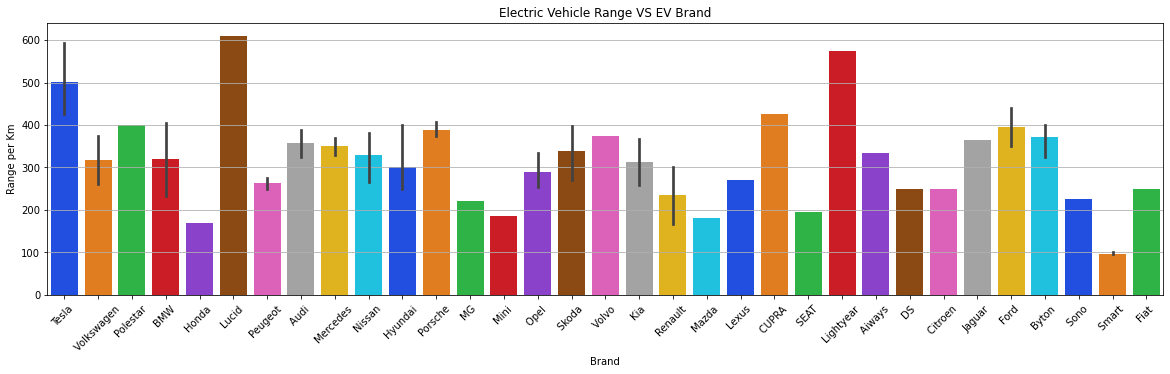

In [11]:
# EV Brand and its corresponding range plot

ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Range_Km',data=ev,palette='bright')
plt.grid(axis='y')
plt.title('Electric Vehicle Range VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('Range per Km')
plt.xticks(rotation=45)

In [12]:
# Finding the EV Model with highest range
range_df = ev.sort_values(by=['Range_Km'], ascending=False)
range_df[['Brand','Model','Range_Km']].head(n=1)

,Brand,Model,Range_Km
51,Tesla,Roadster,970


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

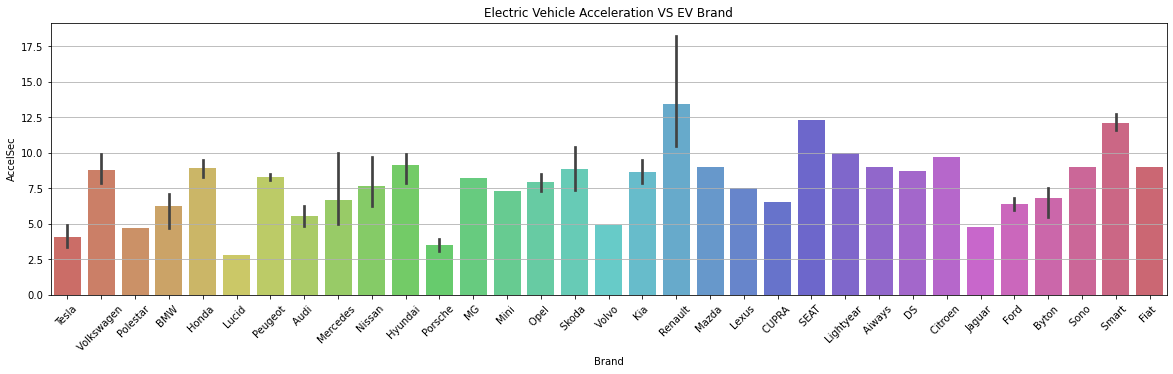

In [13]:
# EV Brand and its acceleration plot

ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='AccelSec',data=ev,palette='hls')
plt.grid(axis='y')
plt.title('Electric Vehicle Acceleration VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('AccelSec')
plt.xticks(rotation=45)

Lucid, Tesla and Porsche are ranking in Top 3, they can accelerate to 60 mph (97 km/h) at very short time and Renault needs the longest time.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

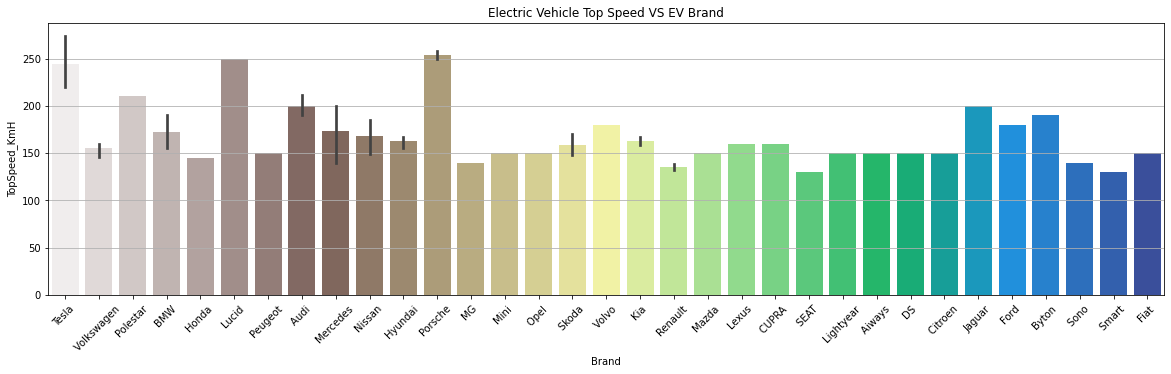

In [14]:
# EV Brand and its corresponding Top speed plot

ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='TopSpeed_KmH',data=ev,palette='terrain_r')
plt.grid(axis='y')
plt.title('Electric Vehicle Top Speed VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('TopSpeed_KmH')
plt.xticks(rotation=45)

Telsa, Porsche and Lucid have the highest Speed and Seat the lowest

In [15]:
# EV Model with top speed
speed_df = ev.sort_values(by=['TopSpeed_KmH'], ascending=False)
speed_df[['Brand','Model','TopSpeed_KmH']].head(n=1)

,Brand,Model,TopSpeed_KmH
51,Tesla,Roadster,410


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

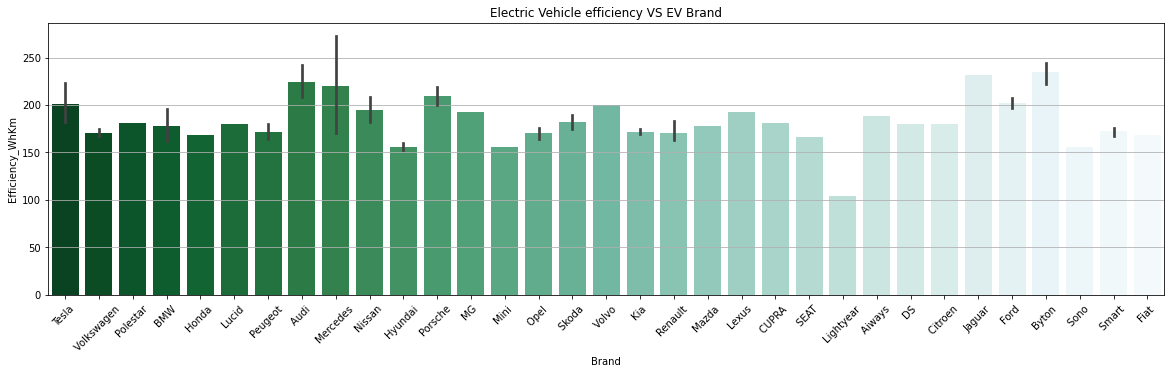

In [16]:
# EV Brand and its efficiency

ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Efficiency_WhKm',data=ev,palette='BuGn_r')
plt.grid(axis='y')
plt.title('Electric Vehicle efficiency VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency_WhKm')
plt.xticks(rotation=45)

Mercedes, Audi and Byton have the highest efficiency and Lightyear the lowest

In [17]:
# EV Model with maximum efficiency
eff_df = ev.sort_values(by=['Efficiency_WhKm'], ascending=False)
eff_df[['Brand','Model','Efficiency_WhKm']].head(n=1)

,Brand,Model,Efficiency_WhKm
84,Mercedes,EQV 300 Long,273


In [18]:
# EV Model having highest range and maximum seats

seat_df = ev.sort_values(by=['Seats'], ascending=False)
seat_df[['Brand','Model','Range_Km', 'Seats']].head(n=1)

,Brand,Model,Range_Km,Seats
21,Tesla,Model Y Long Range Dual Motor,425,7


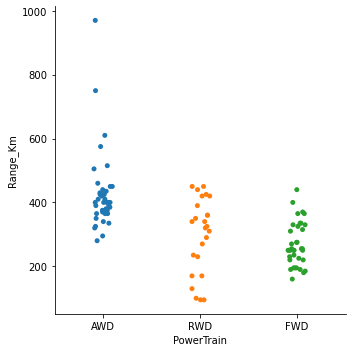

In [19]:
# Distribution plot of range and powertrain used.

fig, axs = plt.subplots(1,2)
sns.catplot(x="PowerTrain", y="Range_Km", data=ev)
plt.close(1)

# Encoding the Categorical data

In [20]:
ev.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [21]:
ev1 = ev[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']]

In [22]:
print(ev1)

# defining the ordinal encoding
encoder = OrdinalEncoder()

# transforming the data
result = encoder.fit_transform(ev1)
print(result)

           Brand                            Model PowerTrain RapidCharge  \
0         Tesla     Model 3 Long Range Dual Motor        AWD         Yes   
1    Volkswagen                         ID.3 Pure        RWD         Yes   
2      Polestar                                 2        AWD         Yes   
3           BMW                              iX3         RWD         Yes   
4         Honda                                e         RWD         Yes   
..           ...                              ...        ...         ...   
98       Nissan                       Ariya 63kWh        FWD         Yes   
99         Audi     e-tron S Sportback 55 quattro        AWD         Yes   
100      Nissan               Ariya e-4ORCE 63kWh        AWD         Yes   
101      Nissan   Ariya e-4ORCE 87kWh Performance        AWD         Yes   
102       Byton                 M-Byte 95 kWh 2WD        AWD         Yes   

       PlugType  BodyStyle Segment  
0    Type 2 CCS      Sedan       D  
1    Type 2 C

In [23]:
temp = ['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']
ev.drop(temp,axis=1,inplace=True)
result = pd.DataFrame(result)
result.columns=["Brand", "Model", "PowerTrain", 'RapidCharge', "PlugType", "BodyStyle", "Segment"]
result.index+=1
result

,Brand,Model,PowerTrain,RapidCharge,PlugType,BodyStyle,Segment
1,30.0,46.0,0.0,1.0,2.0,7.0,3.0
2,31.0,33.0,2.0,1.0,2.0,1.0,2.0
3,23.0,0.0,0.0,1.0,2.0,2.0,3.0
4,2.0,101.0,2.0,1.0,2.0,6.0,3.0
5,9.0,78.0,2.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...
99,20.0,6.0,1.0,1.0,2.0,1.0,2.0
100,1.0,94.0,0.0,1.0,2.0,6.0,4.0
101,20.0,8.0,0.0,1.0,2.0,1.0,2.0
102,20.0,10.0,0.0,1.0,2.0,1.0,2.0


In [24]:
ev1 = ev
ev1.index+=1
ev1[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']] = result[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']]
ev

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,Brand,Model,PowerTrain,RapidCharge,PlugType,BodyStyle,Segment
1,4.6,233,450,161,940,5,55480,30.0,46.0,0.0,1.0,2.0,7.0,3.0
2,10.0,160,270,167,250,5,30000,31.0,33.0,2.0,1.0,2.0,1.0,2.0
3,4.7,210,400,181,620,5,56440,23.0,0.0,0.0,1.0,2.0,2.0,3.0
4,6.8,180,360,206,560,5,68040,2.0,101.0,2.0,1.0,2.0,6.0,3.0
5,9.5,145,170,168,190,4,32997,9.0,78.0,2.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7.5,160,330,191,440,5,45000,20.0,6.0,1.0,1.0,2.0,1.0,2.0
100,4.5,210,335,258,540,5,96050,1.0,94.0,0.0,1.0,2.0,6.0,4.0
101,5.9,200,325,194,440,5,50000,20.0,8.0,0.0,1.0,2.0,1.0,2.0
102,5.1,200,375,232,450,5,65000,20.0,10.0,0.0,1.0,2.0,1.0,2.0


In [25]:
# Checking the correlation between different features

ev.corr()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro,Brand,Model,PowerTrain,RapidCharge,PlugType,BodyStyle,Segment
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.175335,-0.627174,0.062730,-0.050635,0.521011,-0.514820,-0.259657,-0.347164,-0.451568
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.126470,0.829057,0.101759,0.067814,-0.560538,0.251054,-0.010110,0.339230,0.670403
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.300163,0.674844,0.088316,-0.066035,-0.451495,0.401290,0.131297,0.227477,0.628597
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.301230,0.396705,-0.195901,0.010976,-0.394721,0.105673,-0.028761,0.373146,0.623263
Seats,-0.175335,0.126470,0.300163,0.301230,1.000000,0.020920,0.089589,-0.018943,-0.278882,0.423111,-0.029570,0.342489,0.416744
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.020920,1.000000,-0.036023,0.169003,-0.561584,0.197208,-0.000193,0.321713,0.737106
Brand,0.062730,0.101759,0.088316,-0.195901,0.089589,-0.036023,1.000000,-0.401572,0.056464,-0.188137,-0.231104,-0.275860,-0.002040
Model,-0.050635,0.067814,-0.066035,0.010976,-0.018943,0.169003,-0.401572,1.000000,-0.007609,0.144293,0.023750,0.261255,0.068414
PowerTrain,0.521011,-0.560538,-0.451495,-0.394721,-0.278882,-0.561584,0.056464,-0.007609,1.000000,-0.274797,-0.039763,-0.349484,-0.497850
RapidCharge,-0.514820,0.251054,0.401290,0.105673,0.423111,0.197208,-0.188137,0.144293,-0.274797,1.000000,0.539160,0.223577,0.189954


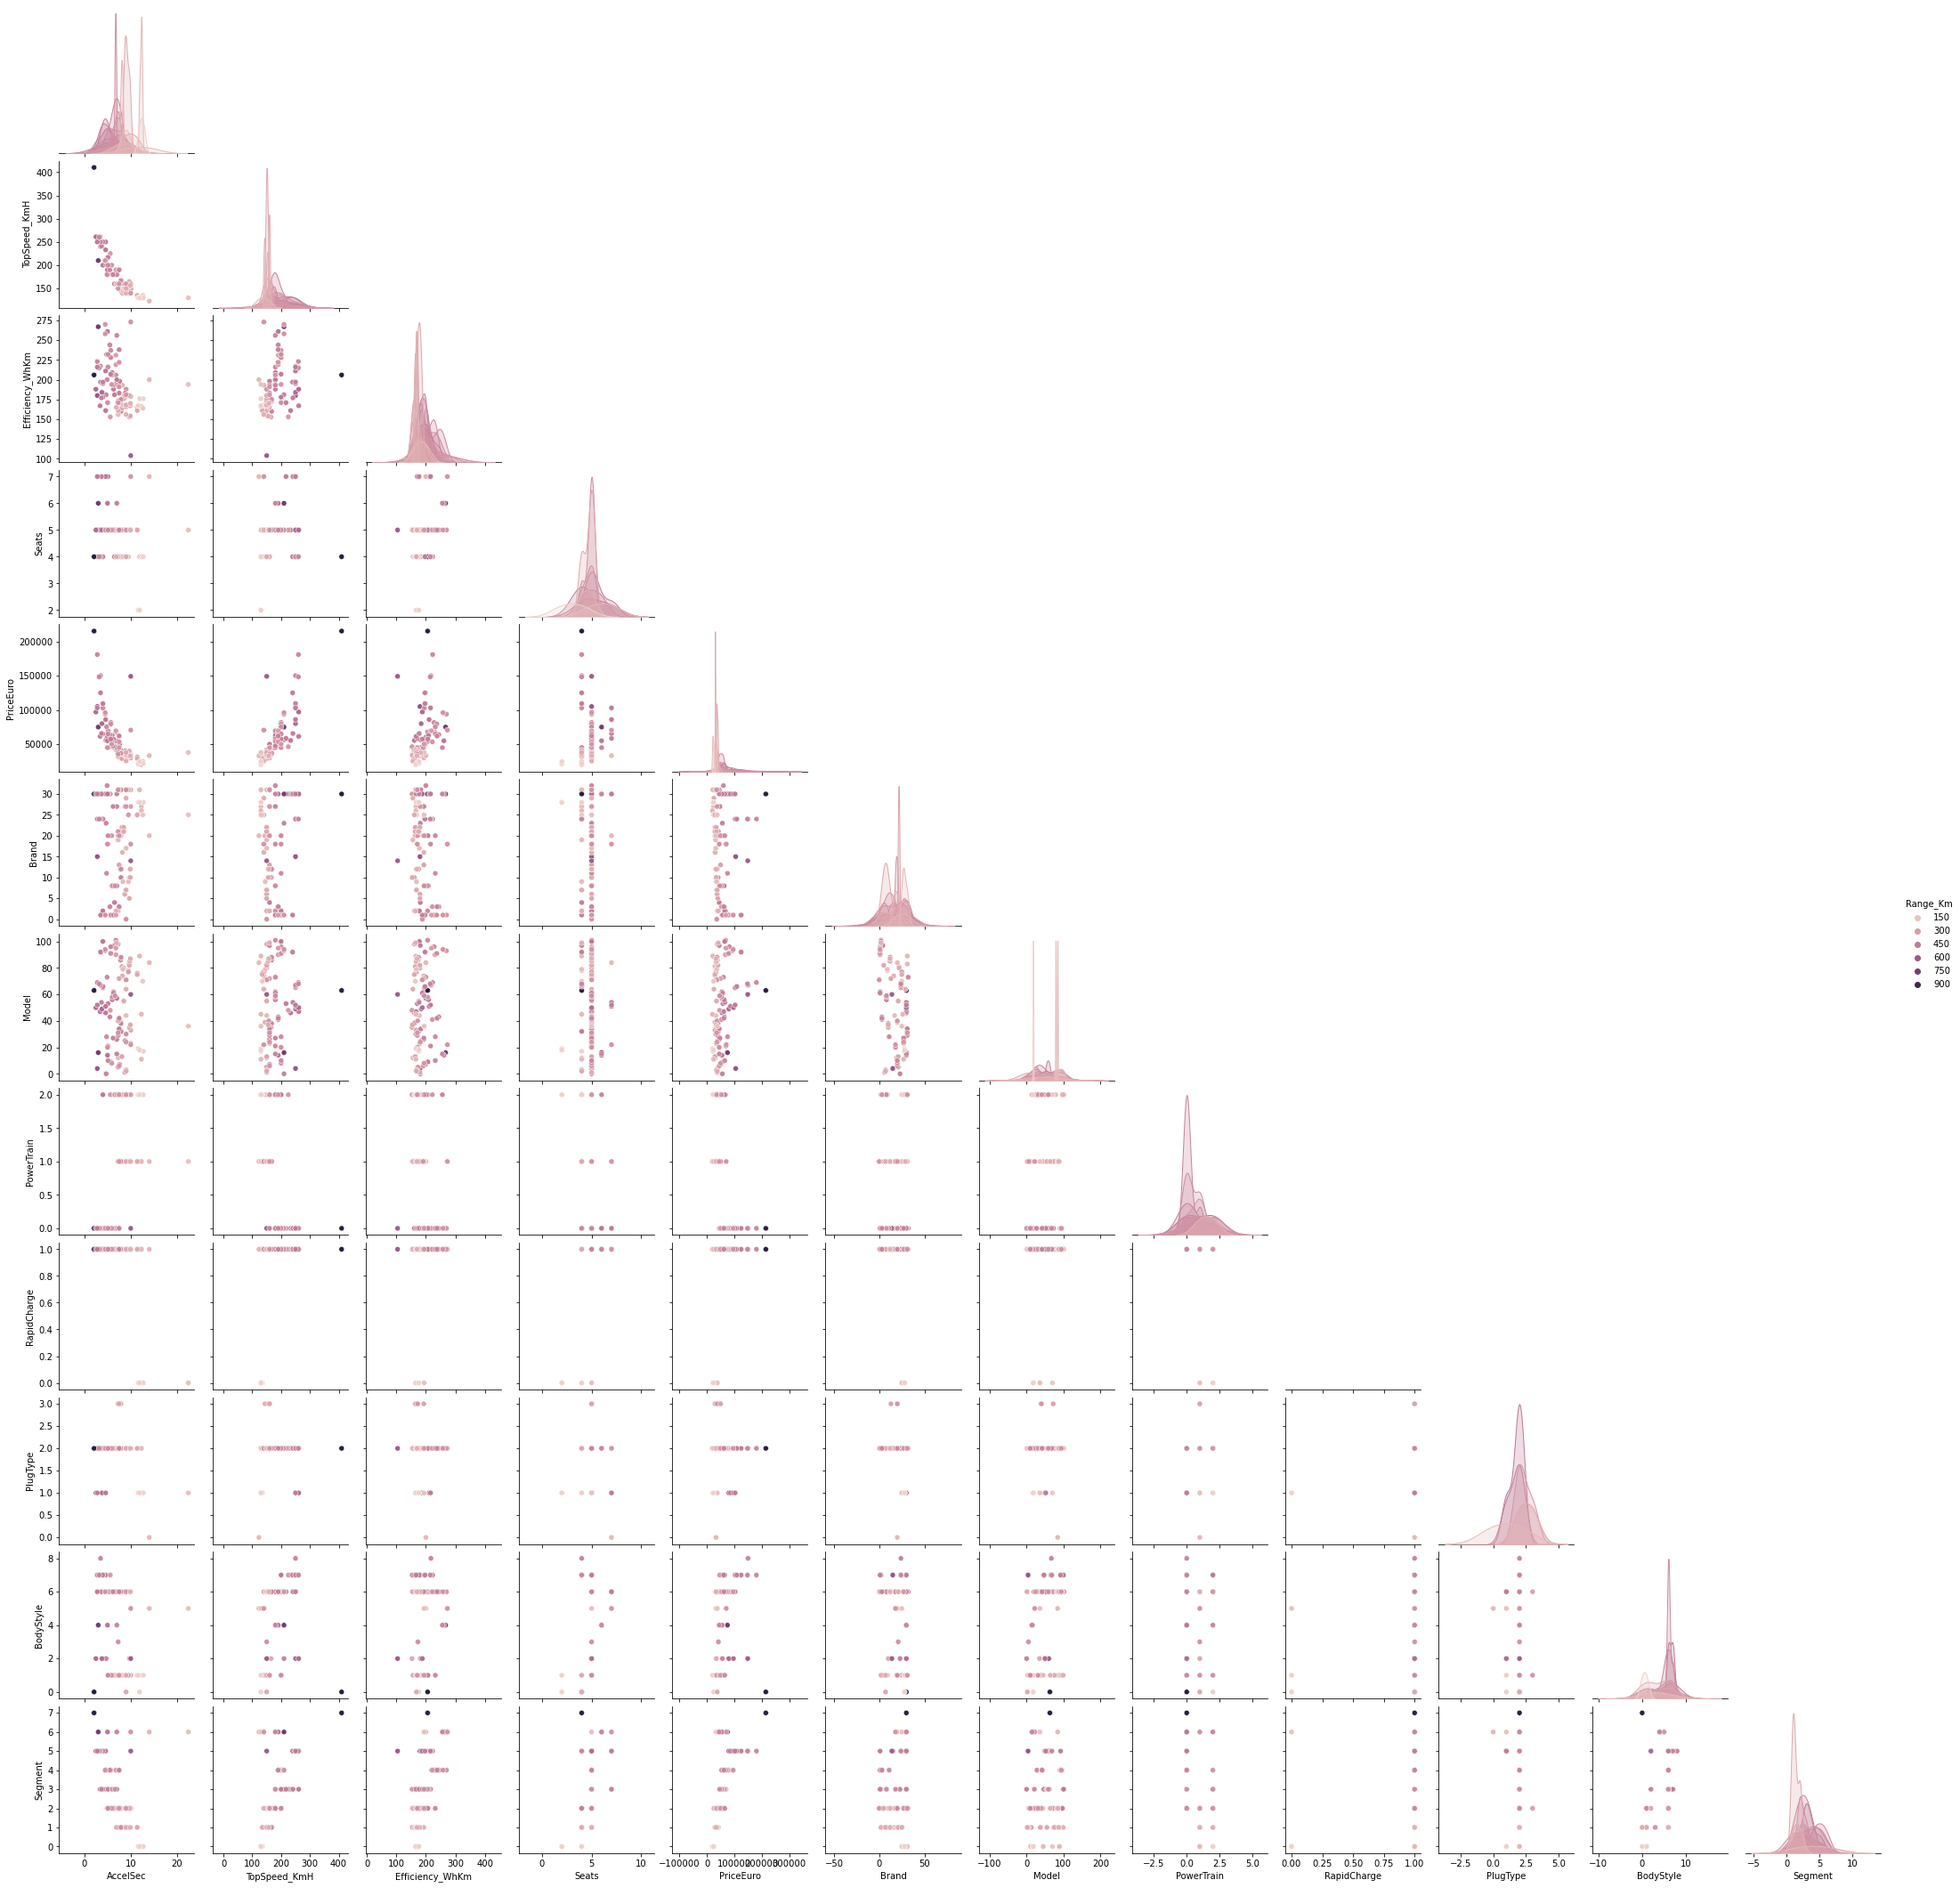

In [26]:
# showing Pairplot of the correlation of data
sns.pairplot(ev,
             corner = True,
             kind = 'scatter',
             hue = 'Range_Km')
plt.show()

<AxesSubplot:>

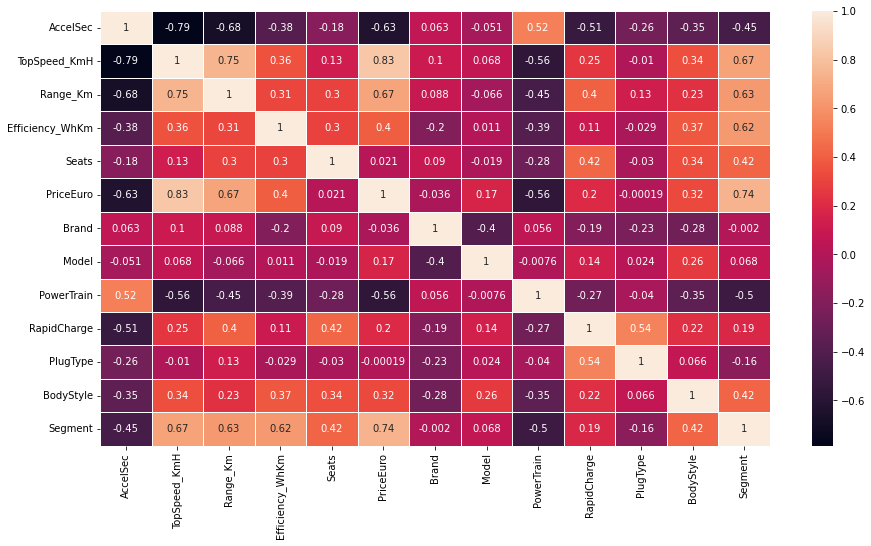

In [27]:
# Heatmap to show the correlation of the data

ax= plt.figure(figsize=(15,8))
sns.heatmap(ev.corr(),linewidths=1,linecolor='white',annot=True)

Electric Vehicle Range have strong positive correlation with Top Speed per Km driving. It might be sufficient to predit Electric Vehicle Range and then calculate range in Top Speed per Km.

Electric Vehicle Range have a strong negative correlation with Acceleration per second.

# Selection of Features

In [28]:
X = ev['TopSpeed_KmH'].values.reshape(-1,1)
y = ev['Range_Km']

# Using Linear Regression for Creating a Model

In [29]:
# splitting the data into Training data and Test Data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
print("X_train : ",X_train.shape)

print("X_test : ",X_test.shape)

print("y_train : ",y_train.shape)

print("y_test : ",y_test.shape)

X_train :  (82, 1)
X_test :  (21, 1)
y_train :  (82,)
y_test :  (21,)


In [31]:
# Creating the linear model and fitting the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = lr.predict(X_test)
y_pred[0:5]

array([359.60303889, 359.60303889, 292.8263226 , 493.15647147,
       381.86194432])

In [33]:
# Checking the coefficient
lr.coef_

array([2.22589054])

In [34]:
#Checking the intercept
lr.intercept_

-63.3161642577993

(0.0, 1013.75)

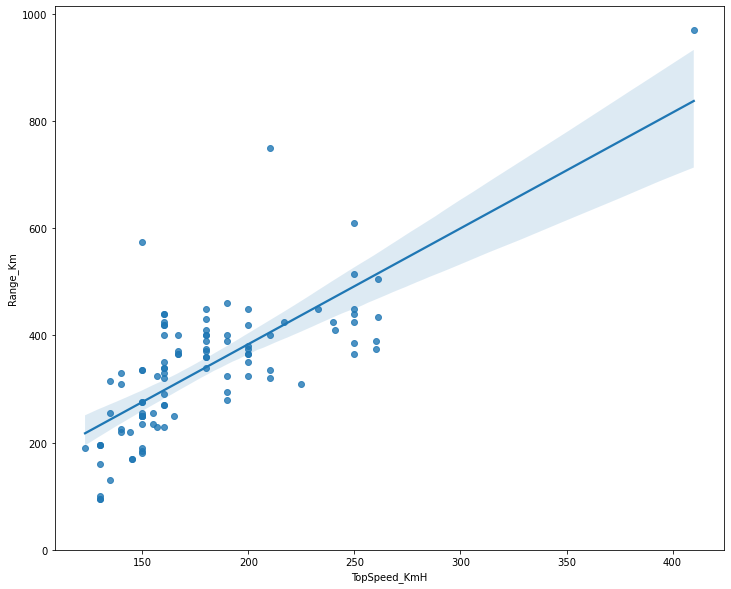

In [35]:
# Range and Topspeed plot
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="TopSpeed_KmH", y="Range_Km", data=ev)
plt.ylim(0,)

We can see from this plot that range is positively correlated to Top Speed per Kmh, since the regression slope is positive. If the slope is positive, y increases as x increases, and the function runs "uphill". When Top_Speed increase, the Range will also increase.

The fitted values for a linear regression model are the predicted values of the outcome variable for the data that is used to fit the model.

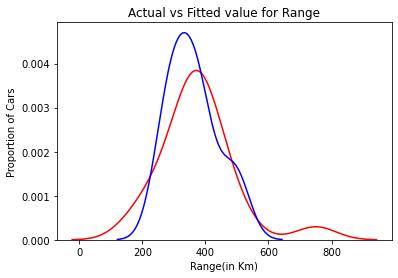

In [36]:
# Distribution of the fitted values that result from the model and the distribution of the actual values
ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="Fitted Values", ax=ax1)
plt.title('Actual vs Fitted value for Range')
plt.xlabel('Range(in Km)')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()

# Model Evaluation

In [37]:
# Calculating the score for Training Data

lr.score(X_train, y_train)
print("R2 for Traing Data: ", lr.score(X_train, y_train))

R2 for Traing Data:  0.6297694922844455


In [38]:
# Calculating the score for Testing Data

lr.score(X_test, y_test)
print("R2 for Testing Data: ", lr.score(X_test, y_test))

R2 for Testing Data:  0.15363068038695216


In [39]:
#Calculating the Mean Squared Error

mean_squared_error(y_test, y_pred)
print("MSE: ", mean_squared_error(y_test, y_pred))

MSE:  11242.893676247608


In [40]:
#Calculating the Mean Absolute Error(MAE)

mean_absolute_error(y_test, y_pred)
print("MAE: ",mean_absolute_error(y_test, y_pred))

MAE:  78.18137850937941


In [41]:
#Calculating the Root Mean Squared Error(RMSE)

print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  106.03251235469057


# Using forward feature selection to pick a good model

In [42]:
X = ev[['TopSpeed_KmH','Efficiency_WhKm','Segment','Seats','AccelSec','PriceEuro']]

In [43]:
y = ev['Range_Km']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Creating a Regression model using Forward Feature Selection by looping over all the features adding one at a time until there are no improvements on the prediction metric ( R2 and AdjustedR2).

In [46]:
show_steps = True   # for testing/debugging
show_steps = False  # without showing steps

# Use Forward Feature Selection to pick a good model

included = []
best = {'feature': '', 'r2': 0, 'a_r2': 0}

# creating a model object to hold the modelling parameters
model = LinearRegression()

n = X_train.shape[0]

r2_list = []
adjusted_r2_list = []

while True:
    changed = False
    
    if show_steps:
        print('') 

    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fiting the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        
        k = len(included) + 1
        
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )
        
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        if adjusted_r2 > best['a_r2']:
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    
    r2_list.append(best['r2'])
    adjusted_r2_list.append(best['a_r2'])

    if changed:
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))

Added feature TopSpeed_KmH with R^2 = 0.630 and adjusted R^2 = 0.625
Added feature PriceEuro with R^2 = 0.655 and adjusted R^2 = 0.646
Added feature Seats with R^2 = 0.682 and adjusted R^2 = 0.669
Added feature AccelSec with R^2 = 0.693 and adjusted R^2 = 0.677
Added feature Efficiency_WhKm with R^2 = 0.701 and adjusted R^2 = 0.681
Added feature Segment with R^2 = 0.705 and adjusted R^2 = 0.681
**************************************************

Resulting features:
TopSpeed_KmH, PriceEuro, Seats, AccelSec, Efficiency_WhKm, Segment


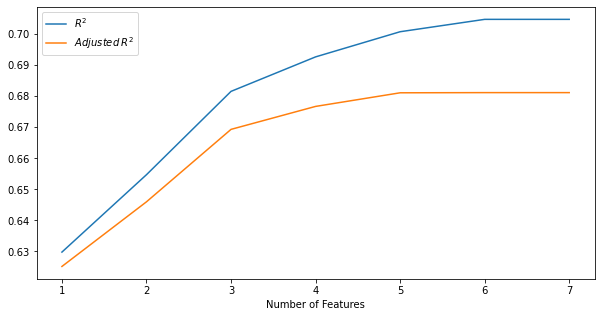

In [47]:
# Plot of R2 and Adjusted R2.

_range = range(1, len(r2_list)+1)

plt.figure(figsize = (10, 5))
plt.plot(_range, r2_list, label = '$R^2$')
plt.plot(_range, adjusted_r2_list, label = '$Adjusted \: R^2$')
plt.xlabel('Number of Features')
plt.legend()
plt.show()

# Regularisation

In [48]:
#Create a Base Model Using Linear Regression

model = LinearRegression()
# Fit
model.fit(X,y)

LinearRegression()

In [49]:
# Checking coefficient
model.coef_

array([ 7.47717179e-01, -6.22509843e-01,  1.65787415e+01,  2.57670219e+01,
       -1.24305613e+01,  6.04144393e-04])

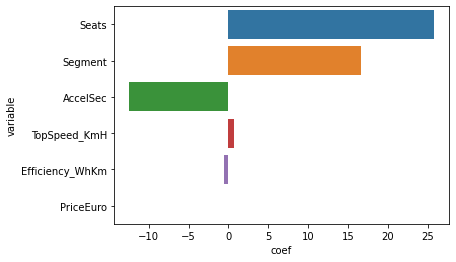

In [50]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="coef", y="variable", data=model_coefs)
# Plotting Coefficients
view_coeff(X, model)

# Calculating using Ridge Regression Model

In [51]:
ridgemodel = Ridge()
coefs = []
errors = []

ridge_alphas = np.logspace(-6, 6, 200) #lambda in the slides

for a in ridge_alphas:
    ridgemodel.set_params(alpha = a)
    ridgemodel.fit(X, y)
    coefs.append(ridgemodel.coef_)
    errors.append(mean_squared_error(ridgemodel.coef_, model.coef_))

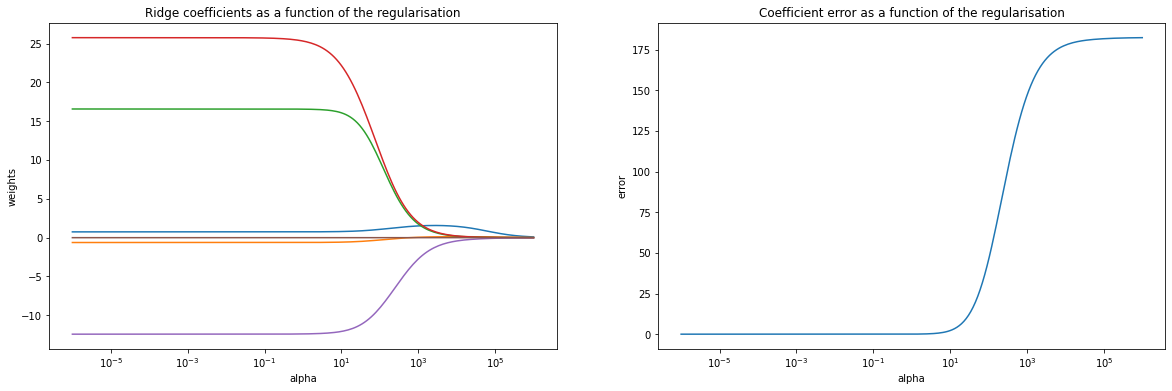

In [52]:
# Visual Representation of Coefficient of Ridge Model

plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

In [53]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))

Alpha: 19.791668678535572
Score: 0.6467904685229369


In [54]:
optimal_ridge.coef_

array([ 8.33733337e-01, -5.29343039e-01,  1.53156424e+01,  1.97312130e+01,
       -1.16862263e+01,  5.71635752e-04])

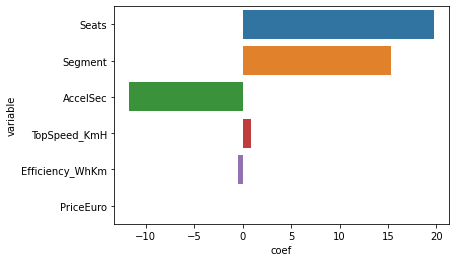

In [55]:
# Plotting Coefficients
view_coeff(X, optimal_ridge)

In [56]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

68.50082915686325
0.7047900146524513
98.54263271897919
0.2689785332674852


# Calculating using Lasso Regression Model

In [57]:
lassomodel = Lasso()

coefs = []
errors = []

lasso_alphas = np.logspace(-6, 6, 200)

for a in lasso_alphas:
    lassomodel.set_params(alpha = a)
    lassomodel.fit(X, y)
    coefs.append(lassomodel.coef_)
    errors.append(mean_squared_error(lassomodel.coef_, model.coef_))

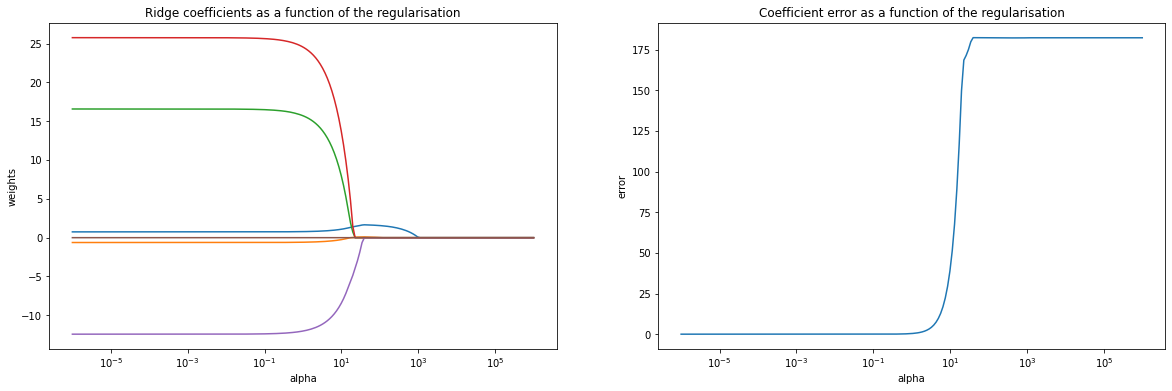

In [58]:
# Visual Representation of Coefficient of Lasso Model

plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

In [59]:
# Finding Optimal Lasso Using LassoCV

optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10)

optimal_lasso.fit(X, y)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X, y))

Alpha: 482.41087041653736
Score: 0.5423596191706892


In [60]:
optimal_lasso.coef_

array([ 0.91176137,  0.        ,  0.        ,  0.        , -0.        ,
        0.00152598])

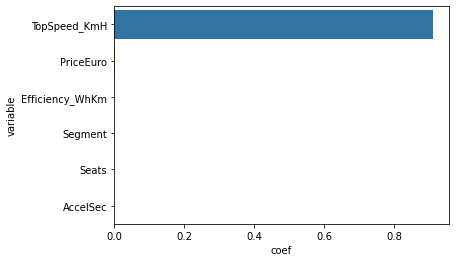

In [61]:
# Plotting the Coefficients
view_coeff(X, optimal_lasso)

In [62]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

68.5008306844336
0.70479000148607
98.54843710334596
0.2688924130894229


# Comparing the residuals for the Ridge and Lasso through visual representation

In [63]:
# Ridge model residuals

optimal_ridge.fit(X_train, y_train)
prediction = optimal_ridge.predict(X_test)
residual_ridge = (y_test - prediction)
print(residual_ridge)

31     -80.653722
68     120.792391
63     135.718933
48    -117.533883
43     -14.067880
41      67.909563
91    -100.717517
46      72.637466
11      15.012017
1       57.864079
19     -32.057118
32      75.420670
98     -14.274991
86     -21.932045
77      72.053241
5      -93.644847
80    -173.389035
34     358.472251
13     100.226171
27      70.433793
101    -21.412395
Name: Range_Km, dtype: float64


In [64]:
# Lasso model residuals

optimal_lasso.fit(X_train, y_train)
prediction = optimal_lasso.predict(X_test)
residual_lasso = (y_test - prediction)
print(residual_lasso)

31     -83.715045
68     113.593859
63     136.640227
48    -120.645532
43     -15.731764
41      61.505778
91    -104.779162
46      71.666541
11      15.321647
1       51.259567
19     -31.318471
32      74.890551
98     -19.305206
86     -20.195942
77      72.106718
5      -91.523348
80    -171.186623
34     351.552557
13     101.122874
27      70.450825
101    -26.417441
Name: Range_Km, dtype: float64


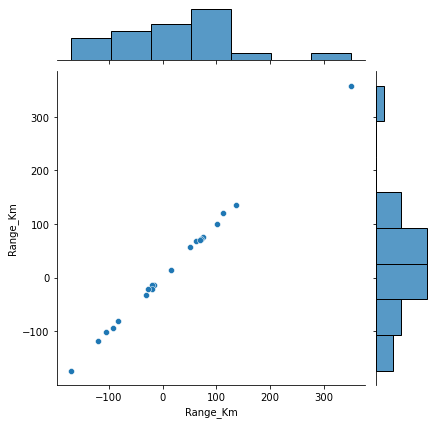

In [65]:
# JointPlot
sns.jointplot(data=ev, x=residual_lasso, y=residual_ridge, kind = 'scatter')